# WK7 Data Visualization <hr style="border:2.5px solid #126782"></hr>

Name: **Shane Althea M. Sormela** <br>
Course: **ME3C**

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv(r"..\raw\chip-dataset-cleaned.csv", delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4854 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistor    4854 non-null   float64
 7   Freq          4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


In [5]:
df = df.drop(df.columns[[10,11,12]],axis=1)
df.head()

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistor,Freq,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,09/06/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,09/02/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,09/01/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,05/03/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD


# N Chips Manufactured

In [6]:
df_w = df.copy()

In [7]:
chip_count = df_w['Vendor'].value_counts()
chip_count

Vendor
AMD       1662
Intel     1392
NVIDIA    1201
ATI        535
Other       64
Name: count, dtype: int64

In [8]:
type(chip_count)

pandas.core.series.Series

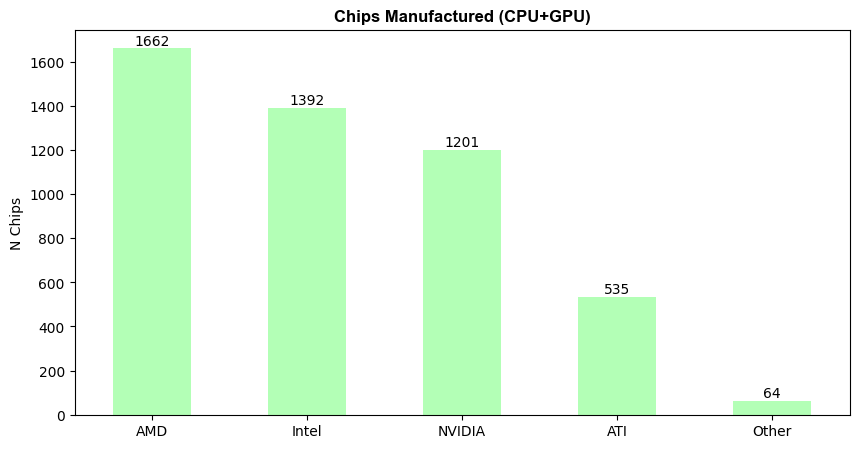

In [9]:
chart = chip_count.plot(kind="bar", color = ['#b3ffb6'], figsize = (10,5))
chart.bar_label(chart.containers[0], label_type="edge")

plt.title("Chips Manufactured (CPU+GPU)",
           fontfamily = "Arial",
           fontsize = 12,
           fontweight = "bold")
plt.xlabel(" ")
chart.set_xticklabels(chip_count.index, rotation=0)
plt.ylabel("N Chips")
plt.show()

# Lowest TDP (Thermal Design Power)

In [10]:
df_tdp = df_w[['Product','TDP']]
df_tdp

,Product,TDP
0,AMD Athlon 64 3500+,45.000000
1,AMD Athlon 200GE,35.000000
2,Intel Core i5-1145G7,28.000000
3,Intel Xeon E5-2603 v2,80.000000
4,AMD Phenom II X4 980 BE,125.000000
...,...,...
4849,NVIDIA Quadro 3000M,75.000000
4850,Intel GMA 950,7.000000
4851,NVIDIA GeForce GT 320M,23.000000
4852,NVIDIA GeForce FX 5200,81.359981


In [11]:
type(df_tdp)

pandas.core.frame.DataFrame

In [12]:
df_tdp = df_tdp.sort_values(by='TDP')
df_tdp

,Product,TDP
2175,Intel Atom Z612,1.0
1964,Intel Atom Z600,1.0
469,Intel Atom Z620,1.0
1550,Intel Atom Z500,1.0
60,Intel Atom Z515,1.0
...,...,...
4605,NVIDIA Quadro Plex 2100 S4,640.0
2908,NVIDIA Tesla S1075,800.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0


In [13]:
df_tdp = df_tdp.head(7)
df_tdp

,Product,TDP
2175,Intel Atom Z612,1.0
1964,Intel Atom Z600,1.0
469,Intel Atom Z620,1.0
1550,Intel Atom Z500,1.0
60,Intel Atom Z515,1.0
1761,Intel Atom Z610,1.0
1424,Intel Atom Z510,2.0


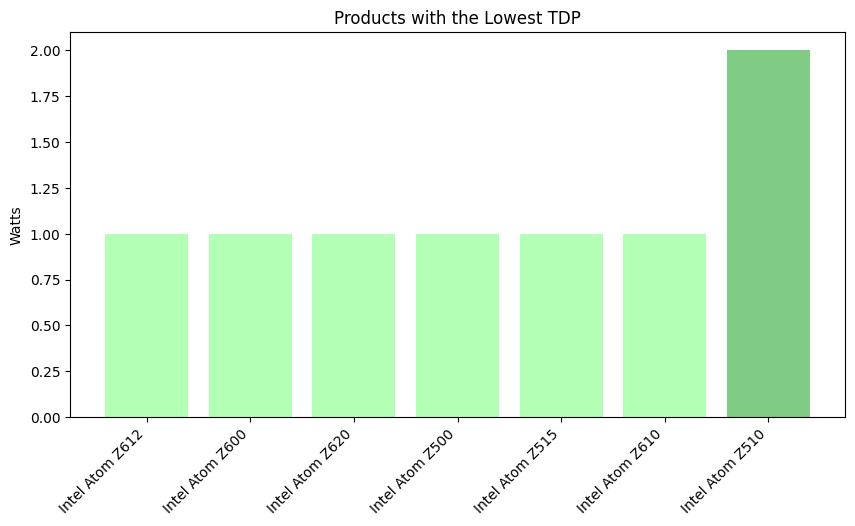

In [14]:
plt.figure(figsize=(10, 5)) 
plt.bar(df_tdp['Product'], df_tdp['TDP'], color=["#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#80cc84"])  
plt.title('Products with the Lowest TDP')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()


# CPU Process Size, Die Size, TDP, Transistor and Frequency Trend 

## N CPU Manufactured

In [15]:
df_cpu = df_w[df_w['Type']=='CPU']
df_cpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistor,Freq,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,09/06/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,09/02/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,09/01/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,05/03/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD
...,...,...,...,...,...,...,...,...,...,...
2187,Intel Xeon Gold 6312U,CPU,04/06/2021,10.0,185.0,188.440445,1929.922279,2400,Intel,Intel
2188,AMD Ryzen 9 4900H,CPU,3/16/2020,7.0,54.0,156.000000,9800.000000,3300,TSMC,AMD
2189,Intel Core 2 Duo E6550,CPU,07/01/2007,65.0,65.0,143.000000,291.000000,2333,Intel,Intel
2190,AMD Opteron 246,CPU,12/01/2004,90.0,85.0,188.440445,106.000000,2000,Unknown,AMD


In [16]:
cpu_count = df_cpu['Vendor'].value_counts()
cpu_count

Vendor
Intel    1242
AMD       950
Name: count, dtype: int64

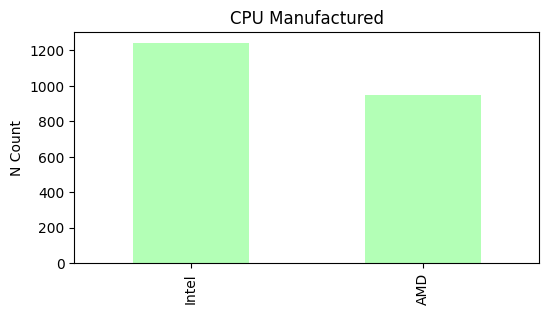

In [17]:
chart = cpu_count.plot(kind='bar',color = ["#b3ffb6"],figsize=(6,3))
plt.title('CPU Manufactured')
plt.ylabel('N Count')
plt.xlabel('')
plt.show()

## CPU Lowest TDP (Thermal Design Power) and Trend

In [18]:
df_ctdp = df_w[['Product','TDP']]
df_ctdp

,Product,TDP
0,AMD Athlon 64 3500+,45.000000
1,AMD Athlon 200GE,35.000000
2,Intel Core i5-1145G7,28.000000
3,Intel Xeon E5-2603 v2,80.000000
4,AMD Phenom II X4 980 BE,125.000000
...,...,...
4849,NVIDIA Quadro 3000M,75.000000
4850,Intel GMA 950,7.000000
4851,NVIDIA GeForce GT 320M,23.000000
4852,NVIDIA GeForce FX 5200,81.359981


In [19]:
df_ctdp = df_ctdp.sort_values(by='TDP')
df_ctdp

,Product,TDP
2175,Intel Atom Z612,1.0
1964,Intel Atom Z600,1.0
469,Intel Atom Z620,1.0
1550,Intel Atom Z500,1.0
60,Intel Atom Z515,1.0
...,...,...
4605,NVIDIA Quadro Plex 2100 S4,640.0
2908,NVIDIA Tesla S1075,800.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0


In [20]:
df_ctdp = df_w[['Type','Product','TDP']].where(df_w['Type']=='CPU').dropna()
df_ctdp = df_ctdp.sort_values(by='TDP')
df_ctdp = df_ctdp.head(7)
df_ctdp

,Type,Product,TDP
60,CPU,Intel Atom Z515,1.0
1550,CPU,Intel Atom Z500,1.0
469,CPU,Intel Atom Z620,1.0
1761,CPU,Intel Atom Z610,1.0
1964,CPU,Intel Atom Z600,1.0
2175,CPU,Intel Atom Z612,1.0
858,CPU,Intel Atom Z540,2.0


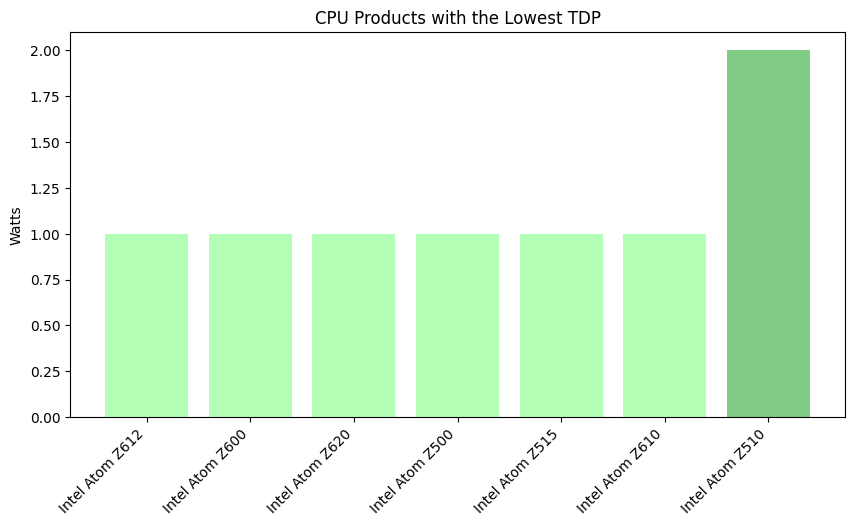

In [21]:
plt.figure(figsize=(10, 5)) 
plt.bar(df_tdp['Product'], df_tdp['TDP'], color=["#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#80cc84"])  
plt.title('CPU Products with the Lowest TDP')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()


In [22]:
df_ctdp = df_w[['Type','Date','Product','TDP']].where(df_w['Type']=='CPU').dropna()
df_ctdp

,Type,Date,Product,TDP
0,CPU,2/20/2007,AMD Athlon 64 3500+,45.0
1,CPU,09/06/2018,AMD Athlon 200GE,35.0
2,CPU,09/02/2020,Intel Core i5-1145G7,28.0
3,CPU,09/01/2013,Intel Xeon E5-2603 v2,80.0
4,CPU,05/03/2011,AMD Phenom II X4 980 BE,125.0
...,...,...,...,...
2187,CPU,04/06/2021,Intel Xeon Gold 6312U,185.0
2188,CPU,3/16/2020,AMD Ryzen 9 4900H,54.0
2189,CPU,07/01/2007,Intel Core 2 Duo E6550,65.0
2190,CPU,12/01/2004,AMD Opteron 246,85.0


In [23]:
df_ctdp['Date'] = pd.to_datetime(df_ctdp['Date'])
df_ctdp['Year'] = df_ctdp['Date'].dt.year
df_ctdp 

,Type,Date,Product,TDP,Year
0,CPU,2007-02-20,AMD Athlon 64 3500+,45.0,2007.0
1,CPU,2018-09-06,AMD Athlon 200GE,35.0,2018.0
2,CPU,2020-09-02,Intel Core i5-1145G7,28.0,2020.0
3,CPU,2013-09-01,Intel Xeon E5-2603 v2,80.0,2013.0
4,CPU,2011-05-03,AMD Phenom II X4 980 BE,125.0,2011.0
...,...,...,...,...,...
2187,CPU,2021-04-06,Intel Xeon Gold 6312U,185.0,2021.0
2188,CPU,2020-03-16,AMD Ryzen 9 4900H,54.0,2020.0
2189,CPU,2007-07-01,Intel Core 2 Duo E6550,65.0,2007.0
2190,CPU,2004-12-01,AMD Opteron 246,85.0,2004.0


In [24]:
df_ctdp = df_ctdp.groupby('Year')['TDP'].mean().reset_index()
df_ctdp

,Year,TDP
0,2000.0,50.470588
1,2001.0,59.186047
2,2002.0,68.487179
3,2003.0,73.630137
4,2004.0,78.250000
5,2005.0,79.525974
6,2006.0,72.822222
7,2007.0,56.608696
8,2008.0,63.589286
9,2009.0,74.426087


Text(0.5, 0, 'Year')

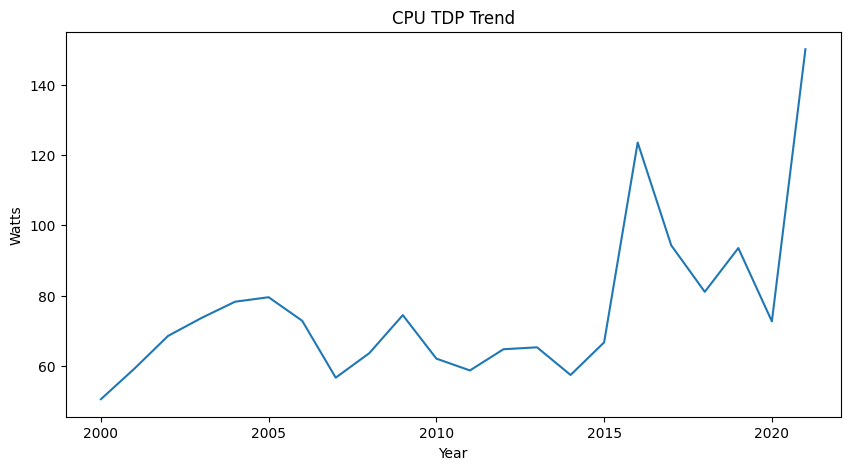

In [25]:
plt.figure(figsize=(10,5))
plt.plot(df_ctdp['Year'],df_ctdp['TDP'])
plt.title('CPU TDP Trend')
plt.ylabel('Watts')
plt.xlabel('Year')

## CPU Process Size Trend

In [26]:
df_cps = df_w[['Type','Product','Date','Process_Size']].where(df_w['Type']=='CPU').dropna()
df_cps

,Type,Product,Date,Process_Size
0,CPU,AMD Athlon 64 3500+,2/20/2007,65.0
1,CPU,AMD Athlon 200GE,09/06/2018,14.0
2,CPU,Intel Core i5-1145G7,09/02/2020,10.0
3,CPU,Intel Xeon E5-2603 v2,09/01/2013,22.0
4,CPU,AMD Phenom II X4 980 BE,05/03/2011,45.0
...,...,...,...,...
2187,CPU,Intel Xeon Gold 6312U,04/06/2021,10.0
2188,CPU,AMD Ryzen 9 4900H,3/16/2020,7.0
2189,CPU,Intel Core 2 Duo E6550,07/01/2007,65.0
2190,CPU,AMD Opteron 246,12/01/2004,90.0


In [27]:
df_cps['Date'] = pd.to_datetime(df_cps['Date'])
df_cps['Year'] = df_cps['Date'].dt.year
df_cps 

,Type,Product,Date,Process_Size,Year
0,CPU,AMD Athlon 64 3500+,2007-02-20,65.0,2007.0
1,CPU,AMD Athlon 200GE,2018-09-06,14.0,2018.0
2,CPU,Intel Core i5-1145G7,2020-09-02,10.0,2020.0
3,CPU,Intel Xeon E5-2603 v2,2013-09-01,22.0,2013.0
4,CPU,AMD Phenom II X4 980 BE,2011-05-03,45.0,2011.0
...,...,...,...,...,...
2187,CPU,Intel Xeon Gold 6312U,2021-04-06,10.0,2021.0
2188,CPU,AMD Ryzen 9 4900H,2020-03-16,7.0,2020.0
2189,CPU,Intel Core 2 Duo E6550,2007-07-01,65.0,2007.0
2190,CPU,AMD Opteron 246,2004-12-01,90.0,2004.0


In [28]:
df_cps = df_w[['Type','Product','Process_Size']].where(df_w['Type']=='CPU').dropna()
df_cps = df_cps.sort_values(by='Process_Size')
df_cps = df_cps.head(7)
df_cps

,Type,Product,Process_Size
2180,CPU,AMD EPYC 7262,7.0
1408,CPU,AMD EPYC 7F32,7.0
2166,CPU,AMD EPYC 7643,7.0
833,CPU,AMD Ryzen 7 4800U,7.0
1610,CPU,AMD Ryzen 5 4600GE,7.0
1857,CPU,AMD Ryzen 7 4800H,7.0
1621,CPU,AMD EPYC 7F52,7.0


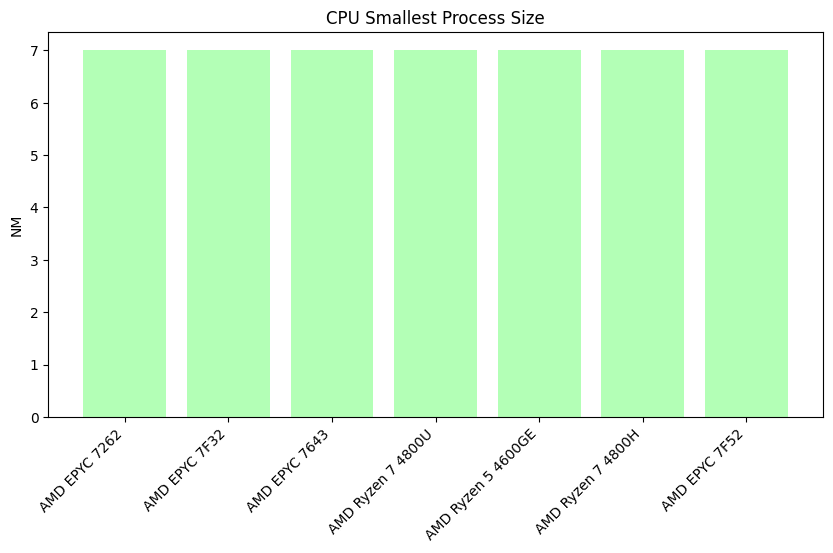

In [29]:
plt.figure(figsize=(10, 5)) 
plt.bar(df_cps['Product'], df_cps['Process_Size'], color=["#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6"])  
plt.title('CPU Smallest Process Size')
plt.ylabel('NM')
plt.xticks(rotation=45, ha='right')
plt.show()


In [30]:
df_cps = df_w[['Type','Date','Product','Process_Size']].where(df_w['Type']=='CPU').dropna()
df_cps

,Type,Date,Product,Process_Size
0,CPU,2/20/2007,AMD Athlon 64 3500+,65.0
1,CPU,09/06/2018,AMD Athlon 200GE,14.0
2,CPU,09/02/2020,Intel Core i5-1145G7,10.0
3,CPU,09/01/2013,Intel Xeon E5-2603 v2,22.0
4,CPU,05/03/2011,AMD Phenom II X4 980 BE,45.0
...,...,...,...,...
2187,CPU,04/06/2021,Intel Xeon Gold 6312U,10.0
2188,CPU,3/16/2020,AMD Ryzen 9 4900H,7.0
2189,CPU,07/01/2007,Intel Core 2 Duo E6550,65.0
2190,CPU,12/01/2004,AMD Opteron 246,90.0


In [31]:
df_cps['Date'] = pd.to_datetime(df_cps['Date'])
df_cps['Year'] = df_cps['Date'].dt.year
df_cps 

,Type,Date,Product,Process_Size,Year
0,CPU,2007-02-20,AMD Athlon 64 3500+,65.0,2007.0
1,CPU,2018-09-06,AMD Athlon 200GE,14.0,2018.0
2,CPU,2020-09-02,Intel Core i5-1145G7,10.0,2020.0
3,CPU,2013-09-01,Intel Xeon E5-2603 v2,22.0,2013.0
4,CPU,2011-05-03,AMD Phenom II X4 980 BE,45.0,2011.0
...,...,...,...,...,...
2187,CPU,2021-04-06,Intel Xeon Gold 6312U,10.0,2021.0
2188,CPU,2020-03-16,AMD Ryzen 9 4900H,7.0,2020.0
2189,CPU,2007-07-01,Intel Core 2 Duo E6550,65.0,2007.0
2190,CPU,2004-12-01,AMD Opteron 246,90.0,2004.0


In [32]:
df_cps = df_cps.groupby('Year')['Process_Size'].mean().reset_index()
df_cps

,Year,Process_Size
0,2000.0,180.000000
1,2001.0,137.790698
2,2002.0,132.564103
3,2003.0,130.000000
4,2004.0,109.705882
5,2005.0,92.954545
6,2006.0,75.925926
7,2007.0,70.869565
8,2008.0,58.571429
9,2009.0,45.913043


Text(0, 0.5, 'nm')

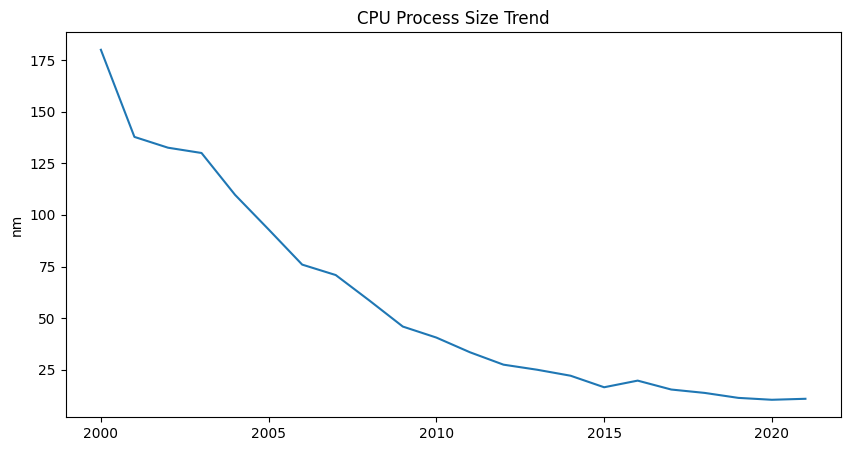

In [33]:
plt.figure(figsize=(10,5))
plt.plot(df_cps['Year'],df_cps['Process_Size'])
plt.title('CPU Process Size Trend')
plt.ylabel('nm')

## CPU Die Size Trend

In [34]:
df_cds = df_w[['Type','Product','Date','Die_Size']].where(df_w['Type']=='CPU').dropna()
df_cds

,Type,Product,Date,Die_Size
0,CPU,AMD Athlon 64 3500+,2/20/2007,77.000000
1,CPU,AMD Athlon 200GE,09/06/2018,192.000000
2,CPU,Intel Core i5-1145G7,09/02/2020,188.440445
3,CPU,Intel Xeon E5-2603 v2,09/01/2013,160.000000
4,CPU,AMD Phenom II X4 980 BE,05/03/2011,258.000000
...,...,...,...,...
2187,CPU,Intel Xeon Gold 6312U,04/06/2021,188.440445
2188,CPU,AMD Ryzen 9 4900H,3/16/2020,156.000000
2189,CPU,Intel Core 2 Duo E6550,07/01/2007,143.000000
2190,CPU,AMD Opteron 246,12/01/2004,188.440445


In [35]:
df_cds['Date'] = pd.to_datetime(df_cds['Date'])
df_cds['Year'] = df_cds['Date'].dt.year
df_cds 

,Type,Product,Date,Die_Size,Year
0,CPU,AMD Athlon 64 3500+,2007-02-20,77.000000,2007.0
1,CPU,AMD Athlon 200GE,2018-09-06,192.000000,2018.0
2,CPU,Intel Core i5-1145G7,2020-09-02,188.440445,2020.0
3,CPU,Intel Xeon E5-2603 v2,2013-09-01,160.000000,2013.0
4,CPU,AMD Phenom II X4 980 BE,2011-05-03,258.000000,2011.0
...,...,...,...,...,...
2187,CPU,Intel Xeon Gold 6312U,2021-04-06,188.440445,2021.0
2188,CPU,AMD Ryzen 9 4900H,2020-03-16,156.000000,2020.0
2189,CPU,Intel Core 2 Duo E6550,2007-07-01,143.000000,2007.0
2190,CPU,AMD Opteron 246,2004-12-01,188.440445,2004.0


In [36]:
df_cds = df_w[['Type','Product','Die_Size']].where(df_w['Type']=='CPU').dropna()
df_cds = df_cds.sort_values(by='Die_Size')
df_cds = df_cds.head(7)
df_cds

,Type,Product,Die_Size
1410,CPU,AMD Athlon 64 3500+ (F3),1.0
1150,CPU,AMD Athlon 64 4000+ (F3),1.0
888,CPU,AMD Athlon 64 3800+ (F3),1.0
610,CPU,AMD Athlon 64 LE-1600,3.0
280,CPU,AMD Athlon 64 LE-1640,3.0
895,CPU,AMD Athlon 64 LE-1620,3.0
1745,CPU,Intel Core i5-3470T,6.0


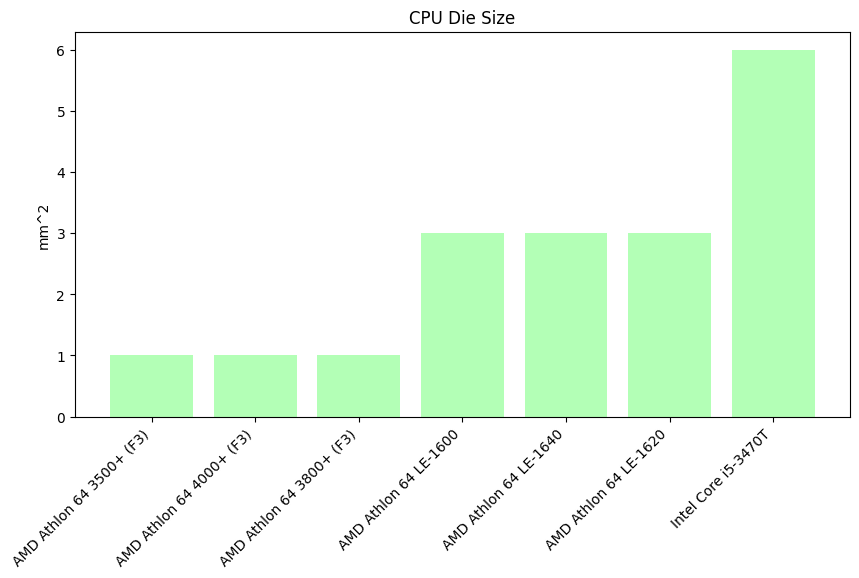

In [37]:
plt.figure(figsize=(10, 5)) 
plt.bar(df_cds['Product'], df_cds['Die_Size'], color=["#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6"])  
plt.title('CPU Die Size')
plt.ylabel('mm^2')
plt.xticks(rotation=45, ha='right')
plt.show()


In [38]:
df_cds = df_w[['Type','Date','Product','Die_Size']].where(df_w['Type']=='CPU').dropna()
df_cds

,Type,Date,Product,Die_Size
0,CPU,2/20/2007,AMD Athlon 64 3500+,77.000000
1,CPU,09/06/2018,AMD Athlon 200GE,192.000000
2,CPU,09/02/2020,Intel Core i5-1145G7,188.440445
3,CPU,09/01/2013,Intel Xeon E5-2603 v2,160.000000
4,CPU,05/03/2011,AMD Phenom II X4 980 BE,258.000000
...,...,...,...,...
2187,CPU,04/06/2021,Intel Xeon Gold 6312U,188.440445
2188,CPU,3/16/2020,AMD Ryzen 9 4900H,156.000000
2189,CPU,07/01/2007,Intel Core 2 Duo E6550,143.000000
2190,CPU,12/01/2004,AMD Opteron 246,188.440445


In [39]:
df_cds['Date'] = pd.to_datetime(df_cds['Date'])
df_cds['Year'] = df_cds['Date'].dt.year
df_cds 

,Type,Date,Product,Die_Size,Year
0,CPU,2007-02-20,AMD Athlon 64 3500+,77.000000,2007.0
1,CPU,2018-09-06,AMD Athlon 200GE,192.000000,2018.0
2,CPU,2020-09-02,Intel Core i5-1145G7,188.440445,2020.0
3,CPU,2013-09-01,Intel Xeon E5-2603 v2,160.000000,2013.0
4,CPU,2011-05-03,AMD Phenom II X4 980 BE,258.000000,2011.0
...,...,...,...,...,...
2187,CPU,2021-04-06,Intel Xeon Gold 6312U,188.440445,2021.0
2188,CPU,2020-03-16,AMD Ryzen 9 4900H,156.000000,2020.0
2189,CPU,2007-07-01,Intel Core 2 Duo E6550,143.000000,2007.0
2190,CPU,2004-12-01,AMD Opteron 246,188.440445,2004.0


In [40]:
df_cds = df_cds.groupby('Year')['Die_Size'].mean().reset_index()
df_cds

,Year,Die_Size
0,2000.0,129.058824
1,2001.0,124.872093
2,2002.0,130.641026
3,2003.0,168.835123
4,2004.0,148.858889
5,2005.0,155.710329
6,2006.0,172.474156
7,2007.0,134.437713
8,2008.0,163.509349
9,2009.0,185.695652


Text(0, 0.5, 'mm^2')

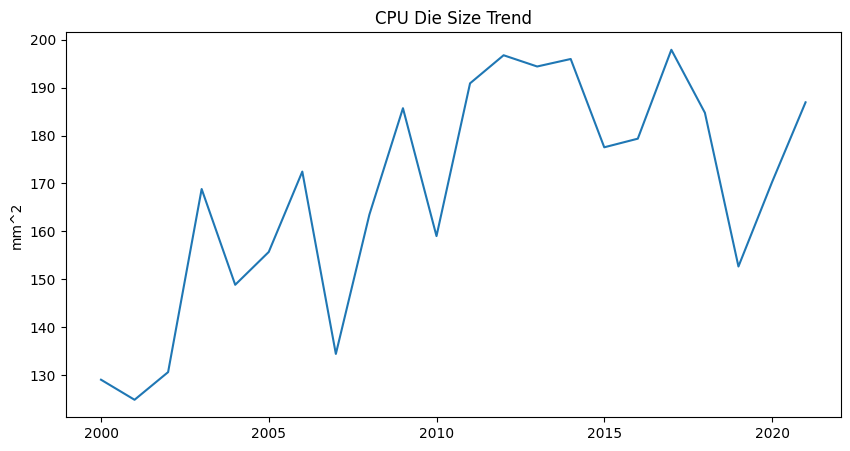

In [41]:
plt.figure(figsize=(10,5))
plt.plot(df_cds['Year'],df_cds['Die_Size'])
plt.title('CPU Die Size Trend')
plt.ylabel('mm^2')

## CPU Transistor Trend

In [42]:
df_ctr = df_w[['Type','Product','Date','Transistor']].where(df_w['Type']=='CPU').dropna()
df_ctr

,Type,Product,Date,Transistor
0,CPU,AMD Athlon 64 3500+,2/20/2007,122.000000
1,CPU,AMD Athlon 200GE,09/06/2018,4800.000000
2,CPU,Intel Core i5-1145G7,09/02/2020,1929.922279
3,CPU,Intel Xeon E5-2603 v2,09/01/2013,1400.000000
4,CPU,AMD Phenom II X4 980 BE,05/03/2011,758.000000
...,...,...,...,...
2187,CPU,Intel Xeon Gold 6312U,04/06/2021,1929.922279
2188,CPU,AMD Ryzen 9 4900H,3/16/2020,9800.000000
2189,CPU,Intel Core 2 Duo E6550,07/01/2007,291.000000
2190,CPU,AMD Opteron 246,12/01/2004,106.000000


In [43]:
df_ctr['Date'] = pd.to_datetime(df_ctr['Date'])
df_ctr['Year'] = df_ctr['Date'].dt.year
df_ctr 

,Type,Product,Date,Transistor,Year
0,CPU,AMD Athlon 64 3500+,2007-02-20,122.000000,2007.0
1,CPU,AMD Athlon 200GE,2018-09-06,4800.000000,2018.0
2,CPU,Intel Core i5-1145G7,2020-09-02,1929.922279,2020.0
3,CPU,Intel Xeon E5-2603 v2,2013-09-01,1400.000000,2013.0
4,CPU,AMD Phenom II X4 980 BE,2011-05-03,758.000000,2011.0
...,...,...,...,...,...
2187,CPU,Intel Xeon Gold 6312U,2021-04-06,1929.922279,2021.0
2188,CPU,AMD Ryzen 9 4900H,2020-03-16,9800.000000,2020.0
2189,CPU,Intel Core 2 Duo E6550,2007-07-01,291.000000,2007.0
2190,CPU,AMD Opteron 246,2004-12-01,106.000000,2004.0


In [44]:
df_ctr = df_w[['Type','Product','Transistor']].where(df_w['Type']=='CPU').dropna()
df_ctr = df_ctr.sort_values(by='Transistor')
df_ctr = df_ctr.head(7)
df_ctr

,Type,Product,Transistor
1310,CPU,AMD Sempron 2600+,37.0
720,CPU,AMD Athlon XP 1700+,37.0
1709,CPU,AMD Athlon XP 1600+,37.0
796,CPU,AMD Athlon XP 2000+,37.0
1646,CPU,AMD Athlon XP 1800+,37.0
801,CPU,AMD Sempron 2400+,37.0
661,CPU,AMD Athlon 1333,37.0


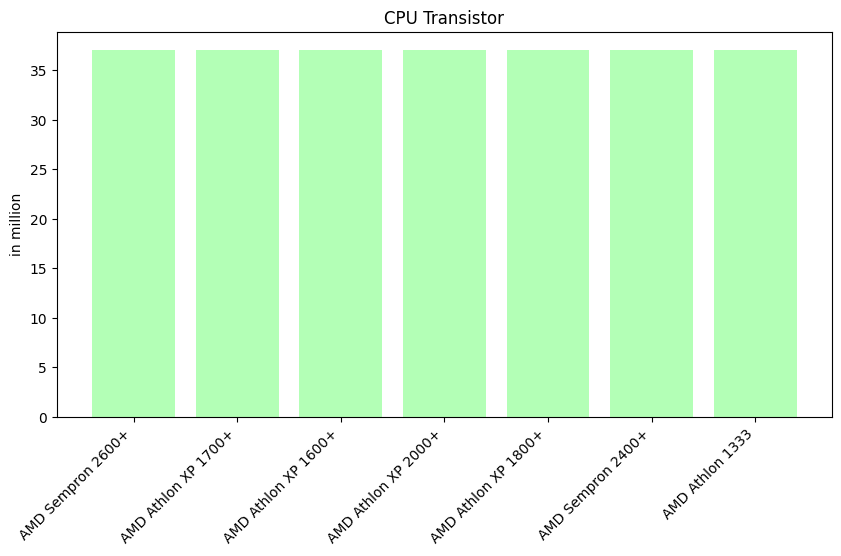

In [45]:
plt.figure(figsize=(10, 5)) 
plt.bar(df_ctr['Product'], df_ctr['Transistor'], color=["#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6"])  
plt.title('CPU Transistor')
plt.ylabel('in million')
plt.xticks(rotation=45, ha='right')
plt.show()


In [46]:
df_ctr = df_w[['Type','Date','Product','Transistor']].where(df_w['Type']=='CPU').dropna()
df_ctr

,Type,Date,Product,Transistor
0,CPU,2/20/2007,AMD Athlon 64 3500+,122.000000
1,CPU,09/06/2018,AMD Athlon 200GE,4800.000000
2,CPU,09/02/2020,Intel Core i5-1145G7,1929.922279
3,CPU,09/01/2013,Intel Xeon E5-2603 v2,1400.000000
4,CPU,05/03/2011,AMD Phenom II X4 980 BE,758.000000
...,...,...,...,...
2187,CPU,04/06/2021,Intel Xeon Gold 6312U,1929.922279
2188,CPU,3/16/2020,AMD Ryzen 9 4900H,9800.000000
2189,CPU,07/01/2007,Intel Core 2 Duo E6550,291.000000
2190,CPU,12/01/2004,AMD Opteron 246,106.000000


In [47]:
df_ctr['Date'] = pd.to_datetime(df_ctr['Date'])
df_ctr['Year'] = df_ctr['Date'].dt.year
df_ctr 

,Type,Date,Product,Transistor,Year
0,CPU,2007-02-20,AMD Athlon 64 3500+,122.000000,2007.0
1,CPU,2018-09-06,AMD Athlon 200GE,4800.000000,2018.0
2,CPU,2020-09-02,Intel Core i5-1145G7,1929.922279,2020.0
3,CPU,2013-09-01,Intel Xeon E5-2603 v2,1400.000000,2013.0
4,CPU,2011-05-03,AMD Phenom II X4 980 BE,758.000000,2011.0
...,...,...,...,...,...
2187,CPU,2021-04-06,Intel Xeon Gold 6312U,1929.922279,2021.0
2188,CPU,2020-03-16,AMD Ryzen 9 4900H,9800.000000,2020.0
2189,CPU,2007-07-01,Intel Core 2 Duo E6550,291.000000,2007.0
2190,CPU,2004-12-01,AMD Opteron 246,106.000000,2004.0


In [48]:
df_ctr = df_ctr.groupby('Year')['Transistor'].mean().reset_index()
df_ctr

,Year,Transistor
0,2000.0,38.000000
1,2001.0,65.197674
2,2002.0,51.846154
3,2003.0,89.315068
4,2004.0,104.213235
5,2005.0,230.580378
6,2006.0,478.256880
7,2007.0,398.007734
8,2008.0,606.076101
9,2009.0,533.860870


Text(0, 0.5, 'in million')

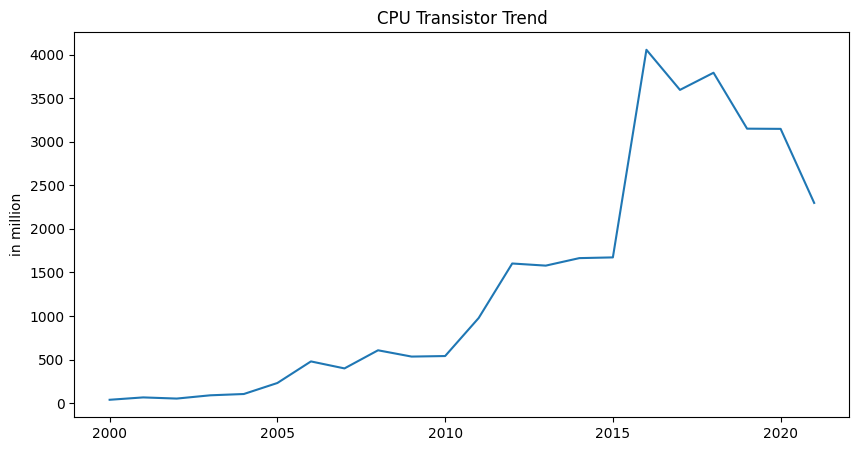

In [49]:
plt.figure(figsize=(10,5))
plt.plot(df_ctr['Year'],df_ctr['Transistor'])
plt.title('CPU Transistor Trend')
plt.ylabel('in million')

## CPU Frequency Trend

In [50]:
df_cfr = df_w[['Type','Product','Date','Freq']].where(df_w['Type']=='CPU').dropna()
df_cfr

,Type,Product,Date,Freq
0,CPU,AMD Athlon 64 3500+,2/20/2007,2200.0
1,CPU,AMD Athlon 200GE,09/06/2018,3200.0
2,CPU,Intel Core i5-1145G7,09/02/2020,2600.0
3,CPU,Intel Xeon E5-2603 v2,09/01/2013,1800.0
4,CPU,AMD Phenom II X4 980 BE,05/03/2011,3700.0
...,...,...,...,...
2187,CPU,Intel Xeon Gold 6312U,04/06/2021,2400.0
2188,CPU,AMD Ryzen 9 4900H,3/16/2020,3300.0
2189,CPU,Intel Core 2 Duo E6550,07/01/2007,2333.0
2190,CPU,AMD Opteron 246,12/01/2004,2000.0


In [51]:
df_cfr['Date'] = pd.to_datetime(df_cfr['Date'])
df_cfr['Year'] = df_cfr['Date'].dt.year
df_cfr 

,Type,Product,Date,Freq,Year
0,CPU,AMD Athlon 64 3500+,2007-02-20,2200.0,2007.0
1,CPU,AMD Athlon 200GE,2018-09-06,3200.0,2018.0
2,CPU,Intel Core i5-1145G7,2020-09-02,2600.0,2020.0
3,CPU,Intel Xeon E5-2603 v2,2013-09-01,1800.0,2013.0
4,CPU,AMD Phenom II X4 980 BE,2011-05-03,3700.0,2011.0
...,...,...,...,...,...
2187,CPU,Intel Xeon Gold 6312U,2021-04-06,2400.0,2021.0
2188,CPU,AMD Ryzen 9 4900H,2020-03-16,3300.0,2020.0
2189,CPU,Intel Core 2 Duo E6550,2007-07-01,2333.0,2007.0
2190,CPU,AMD Opteron 246,2004-12-01,2000.0,2004.0


In [52]:
df_cfr = df_w[['Type','Product','Freq']].where(df_w['Type']=='CPU').dropna()
df_cfr = df_cfr.sort_values(by='Freq')
df_cfr = df_cfr.head(7)
df_cfr

,Type,Product,Freq
1495,CPU,Intel Atom E625C,600.0
1731,CPU,Intel Atom E625CT,600.0
331,CPU,Intel Atom E620T,600.0
836,CPU,Intel Atom E620,600.0
1388,CPU,AMD Athlon 600,600.0
264,CPU,Intel A100,600.0
2008,CPU,AMD Athlon 650,650.0


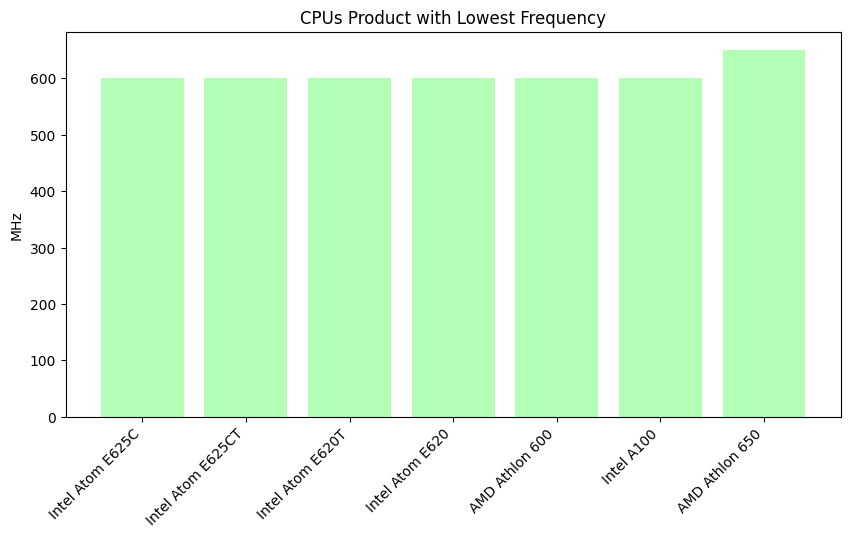

In [53]:
plt.figure(figsize=(10, 5)) 
plt.bar(df_cfr['Product'], df_cfr['Freq'], color=["#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6"])  
plt.title('CPUs Product with Lowest Frequency')
plt.ylabel('MHz')
plt.xticks(rotation=45, ha='right')
plt.show()


In [54]:
df_cfr = df_w[['Type','Date','Product','Freq']].where(df_w['Type']=='CPU').dropna()
df_cfr

,Type,Date,Product,Freq
0,CPU,2/20/2007,AMD Athlon 64 3500+,2200.0
1,CPU,09/06/2018,AMD Athlon 200GE,3200.0
2,CPU,09/02/2020,Intel Core i5-1145G7,2600.0
3,CPU,09/01/2013,Intel Xeon E5-2603 v2,1800.0
4,CPU,05/03/2011,AMD Phenom II X4 980 BE,3700.0
...,...,...,...,...
2187,CPU,04/06/2021,Intel Xeon Gold 6312U,2400.0
2188,CPU,3/16/2020,AMD Ryzen 9 4900H,3300.0
2189,CPU,07/01/2007,Intel Core 2 Duo E6550,2333.0
2190,CPU,12/01/2004,AMD Opteron 246,2000.0


In [55]:
df_cfr['Date'] = pd.to_datetime(df_cfr['Date'])
df_cfr['Year'] = df_cfr['Date'].dt.year
df_cfr 

,Type,Date,Product,Freq,Year
0,CPU,2007-02-20,AMD Athlon 64 3500+,2200.0,2007.0
1,CPU,2018-09-06,AMD Athlon 200GE,3200.0,2018.0
2,CPU,2020-09-02,Intel Core i5-1145G7,2600.0,2020.0
3,CPU,2013-09-01,Intel Xeon E5-2603 v2,1800.0,2013.0
4,CPU,2011-05-03,AMD Phenom II X4 980 BE,3700.0,2011.0
...,...,...,...,...,...
2187,CPU,2021-04-06,Intel Xeon Gold 6312U,2400.0,2021.0
2188,CPU,2020-03-16,AMD Ryzen 9 4900H,3300.0,2020.0
2189,CPU,2007-07-01,Intel Core 2 Duo E6550,2333.0,2007.0
2190,CPU,2004-12-01,AMD Opteron 246,2000.0,2004.0


In [56]:
df_cfr = df_cfr.groupby('Year')['Freq'].mean().reset_index()
df_cfr

,Year,Freq
0,2000.0,992.117647
1,2001.0,1801.662791
2,2002.0,2050.897436
3,2003.0,2155.369863
4,2004.0,2267.705882
5,2005.0,2409.831169
6,2006.0,2370.696296
7,2007.0,2180.652174
8,2008.0,2287.241071
9,2009.0,2519.904348


Text(0, 0.5, 'nm')

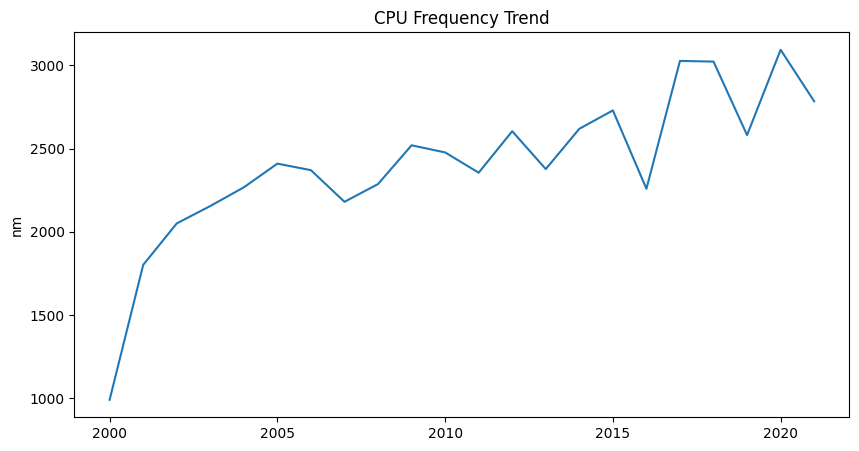

In [57]:
plt.figure(figsize=(10,5))
plt.plot(df_cfr['Year'],df_cfr['Freq'])
plt.title('CPU Frequency Trend')
plt.ylabel('nm')

# GPU Process Size, Die Size, TDP, Transistor and Frequency Trend Data Visualization

## N GPU Manufactured

In [58]:
df_gpu = df_w[df_w['Type']=='GPU']
df_gpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistor,Freq,Foundry,Vendor
2192,Intel Xeon E3-1275,GPU,04/03/2011,32.0,95.000000,216.000000,1160.000000,100,Intel,Intel
2193,Matrox Parhelia 128 MB,GPU,6/25/2002,150.0,81.359981,174.000000,80.000000,200,UMC,Other
2194,NVIDIA GeForce MX150 GP107,GPU,2/23/2019,14.0,25.000000,132.000000,3300.000000,1469,Samsung,NVIDIA
2195,Intel GMA 500,GPU,03/02/2008,130.0,81.359981,188.440445,1929.922279,200,Intel,Intel
2196,ATI Radeon HD 4350 AGP,GPU,9/30/2008,55.0,20.000000,73.000000,242.000000,600,TSMC,ATI
...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,2/22/2011,40.0,75.000000,332.000000,1950.000000,450,TSMC,NVIDIA
4850,Intel GMA 950,GPU,06/01/2005,90.0,7.000000,188.440445,1929.922279,250,Intel,Intel
4851,NVIDIA GeForce GT 320M,GPU,03/03/2010,40.0,23.000000,100.000000,486.000000,500,TSMC,NVIDIA
4852,NVIDIA GeForce FX 5200,GPU,03/06/2003,150.0,81.359981,65.000000,29.000000,250,TSMC,NVIDIA


In [59]:
gpu_count = df_gpu['Vendor'].value_counts()
gpu_count

Vendor
NVIDIA    1201
AMD        712
ATI        535
Intel      150
Other       64
Name: count, dtype: int64

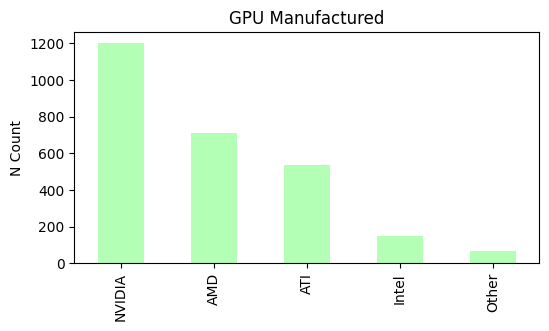

In [60]:
chart = gpu_count.plot(kind='bar',color = ["#b3ffb6"],figsize=(6,3))
plt.title('GPU Manufactured')
plt.ylabel('N Count')
plt.xlabel('')
plt.show()

## GPU Lowest TDP (Thermal Design Power) Trend

In [61]:
df_tdp = df_w[['Product','TDP']]
df_tdp

,Product,TDP
0,AMD Athlon 64 3500+,45.000000
1,AMD Athlon 200GE,35.000000
2,Intel Core i5-1145G7,28.000000
3,Intel Xeon E5-2603 v2,80.000000
4,AMD Phenom II X4 980 BE,125.000000
...,...,...
4849,NVIDIA Quadro 3000M,75.000000
4850,Intel GMA 950,7.000000
4851,NVIDIA GeForce GT 320M,23.000000
4852,NVIDIA GeForce FX 5200,81.359981


In [62]:
df_tdp = df_tdp.sort_values(by='TDP', ascending = False)
df_tdp

,Product,TDP
4821,NVIDIA Tesla S2050,900.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0
2908,NVIDIA Tesla S1075,800.0
4420,NVIDIA Quadro Plex 1000 Model II,640.0
...,...,...
1550,Intel Atom Z500,1.0
1761,Intel Atom Z610,1.0
469,Intel Atom Z620,1.0
2175,Intel Atom Z612,1.0


In [63]:
df_tdp = df_w[['Type','Date','Product','TDP']].where(df_w['Type']=='GPU').dropna()
df_tdp

,Type,Date,Product,TDP
2192,GPU,04/03/2011,Intel Xeon E3-1275,95.000000
2193,GPU,6/25/2002,Matrox Parhelia 128 MB,81.359981
2194,GPU,2/23/2019,NVIDIA GeForce MX150 GP107,25.000000
2195,GPU,03/02/2008,Intel GMA 500,81.359981
2196,GPU,9/30/2008,ATI Radeon HD 4350 AGP,20.000000
...,...,...,...,...
4849,GPU,2/22/2011,NVIDIA Quadro 3000M,75.000000
4850,GPU,06/01/2005,Intel GMA 950,7.000000
4851,GPU,03/03/2010,NVIDIA GeForce GT 320M,23.000000
4852,GPU,03/06/2003,NVIDIA GeForce FX 5200,81.359981


In [64]:
df_tdp['Date'] = pd.to_datetime(df_tdp['Date'])
df_tdp['Year'] = df_tdp['Date'].dt.year
df_tdp 

,Type,Date,Product,TDP,Year
2192,GPU,2011-04-03,Intel Xeon E3-1275,95.000000,2011.0
2193,GPU,2002-06-25,Matrox Parhelia 128 MB,81.359981,2002.0
2194,GPU,2019-02-23,NVIDIA GeForce MX150 GP107,25.000000,2019.0
2195,GPU,2008-03-02,Intel GMA 500,81.359981,2008.0
2196,GPU,2008-09-30,ATI Radeon HD 4350 AGP,20.000000,2008.0
...,...,...,...,...,...
4849,GPU,2011-02-22,NVIDIA Quadro 3000M,75.000000,2011.0
4850,GPU,2005-06-01,Intel GMA 950,7.000000,2005.0
4851,GPU,2010-03-03,NVIDIA GeForce GT 320M,23.000000,2010.0
4852,GPU,2003-03-06,NVIDIA GeForce FX 5200,81.359981,2003.0


In [65]:
df_tdp = df_tdp.groupby('Year')['TDP'].mean().reset_index()
df_tdp

,Year,TDP
0,2000.0,55.258657
1,2001.0,65.297946
2,2002.0,75.419693
3,2003.0,69.121414
4,2004.0,68.908296
5,2005.0,75.262725
6,2006.0,63.032552
7,2007.0,69.652653
8,2008.0,95.534565
9,2009.0,73.114337


Text(0, 0.5, 'nm')

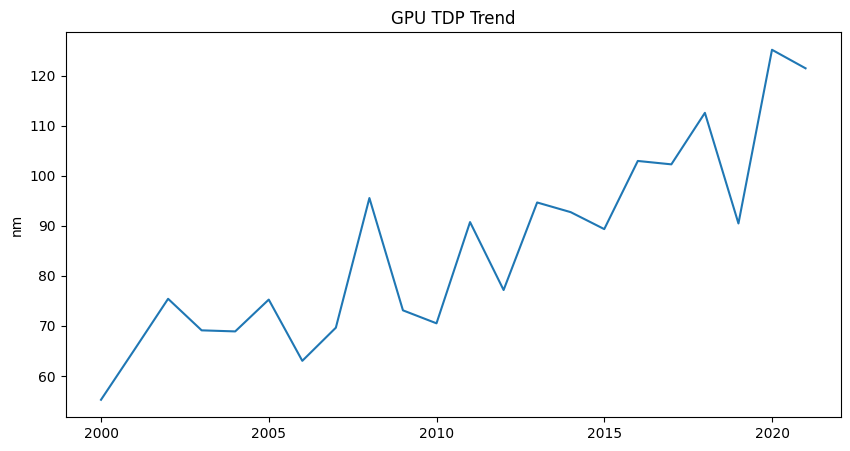

In [66]:
plt.figure(figsize=(10,5))
plt.plot(df_tdp['Year'],df_tdp['TDP'])
plt.title('GPU TDP Trend')
plt.ylabel('nm')

## GPU Process Size Trend

In [67]:
df_ps = df_w[['Type','Product','Date','Process_Size']].where(df_w['Type']=='GPU').dropna()
df_ps

,Type,Product,Date,Process_Size
2192,GPU,Intel Xeon E3-1275,04/03/2011,32.0
2193,GPU,Matrox Parhelia 128 MB,6/25/2002,150.0
2194,GPU,NVIDIA GeForce MX150 GP107,2/23/2019,14.0
2195,GPU,Intel GMA 500,03/02/2008,130.0
2196,GPU,ATI Radeon HD 4350 AGP,9/30/2008,55.0
...,...,...,...,...
4849,GPU,NVIDIA Quadro 3000M,2/22/2011,40.0
4850,GPU,Intel GMA 950,06/01/2005,90.0
4851,GPU,NVIDIA GeForce GT 320M,03/03/2010,40.0
4852,GPU,NVIDIA GeForce FX 5200,03/06/2003,150.0


In [68]:
df_ps = df_ps.sort_values(by='Process_Size')
df_ps = df_ps.head(7)
df_ps

,Type,Product,Date,Process_Size
3882,GPU,Matrox QID,12/17/2004,0.0
4249,GPU,Matrox QID LP PCI,12/17/2004,0.0
3402,GPU,Matrox QID PRO,12/17/2004,0.0
2239,GPU,Matrox QID LP PCIe,12/17/2004,0.0
4087,GPU,AMD Radeon Graphics 448SP,01/12/2021,7.0
4772,GPU,AMD Radeon RX 5600 OEM,1/21/2020,7.0
3937,GPU,AMD Radeon RX 5700,07/07/2019,7.0


In [69]:
df_ps = df_w[['Type','Product','Process_Size']].where(df_w['Type']=='GPU').dropna()
df_ps = df_ps.sort_values(by='Process_Size')
df_ps = df_ps.head(7)
df_ps

,Type,Product,Process_Size
3882,GPU,Matrox QID,0.0
4249,GPU,Matrox QID LP PCI,0.0
3402,GPU,Matrox QID PRO,0.0
2239,GPU,Matrox QID LP PCIe,0.0
4087,GPU,AMD Radeon Graphics 448SP,7.0
4772,GPU,AMD Radeon RX 5600 OEM,7.0
3937,GPU,AMD Radeon RX 5700,7.0


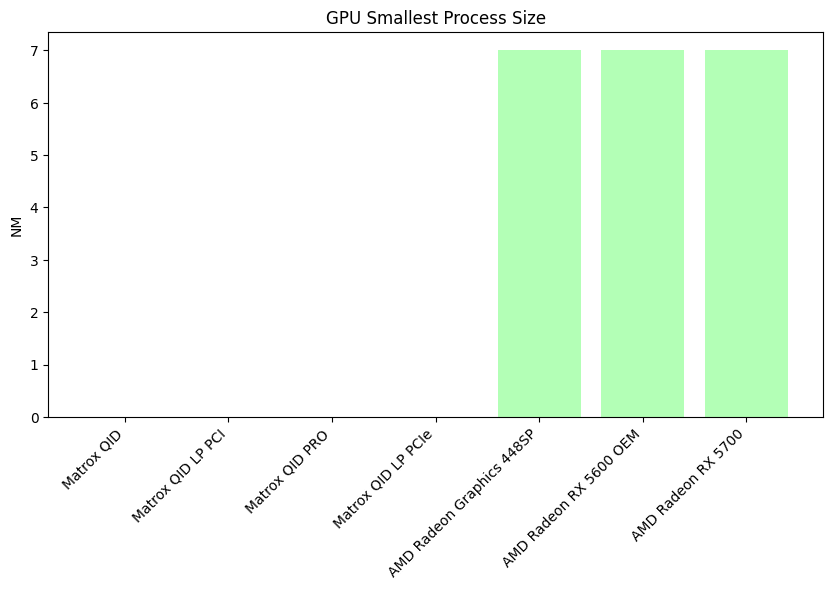

In [70]:
plt.figure(figsize=(10, 5)) 
plt.bar(df_ps['Product'], df_ps['Process_Size'], color=["#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6"])  
plt.title('GPU Smallest Process Size')
plt.ylabel('NM')
plt.xticks(rotation=45, ha='right')
plt.show()


In [71]:
df_ps = df_w[['Type','Date','Product','Process_Size']].where(df_w['Type']=='GPU').dropna()
df_ps

,Type,Date,Product,Process_Size
2192,GPU,04/03/2011,Intel Xeon E3-1275,32.0
2193,GPU,6/25/2002,Matrox Parhelia 128 MB,150.0
2194,GPU,2/23/2019,NVIDIA GeForce MX150 GP107,14.0
2195,GPU,03/02/2008,Intel GMA 500,130.0
2196,GPU,9/30/2008,ATI Radeon HD 4350 AGP,55.0
...,...,...,...,...
4849,GPU,2/22/2011,NVIDIA Quadro 3000M,40.0
4850,GPU,06/01/2005,Intel GMA 950,90.0
4851,GPU,03/03/2010,NVIDIA GeForce GT 320M,40.0
4852,GPU,03/06/2003,NVIDIA GeForce FX 5200,150.0


In [72]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps 

,Type,Date,Product,Process_Size,Year
2192,GPU,2011-04-03,Intel Xeon E3-1275,32.0,2011.0
2193,GPU,2002-06-25,Matrox Parhelia 128 MB,150.0,2002.0
2194,GPU,2019-02-23,NVIDIA GeForce MX150 GP107,14.0,2019.0
2195,GPU,2008-03-02,Intel GMA 500,130.0,2008.0
2196,GPU,2008-09-30,ATI Radeon HD 4350 AGP,55.0,2008.0
...,...,...,...,...,...
4849,GPU,2011-02-22,NVIDIA Quadro 3000M,40.0,2011.0
4850,GPU,2005-06-01,Intel GMA 950,90.0,2005.0
4851,GPU,2010-03-03,NVIDIA GeForce GT 320M,40.0,2010.0
4852,GPU,2003-03-06,NVIDIA GeForce FX 5200,150.0,2003.0


In [73]:
df_ps = df_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_ps

,Year,Process_Size
0,2000.0,180.673973
1,2001.0,162.757339
2,2002.0,153.913043
3,2003.0,140.982143
4,2004.0,121.384615
5,2005.0,112.315789
6,2006.0,93.178295
7,2007.0,80.031646
8,2008.0,63.439306
9,2009.0,52.785087


Text(0, 0.5, 'nm')

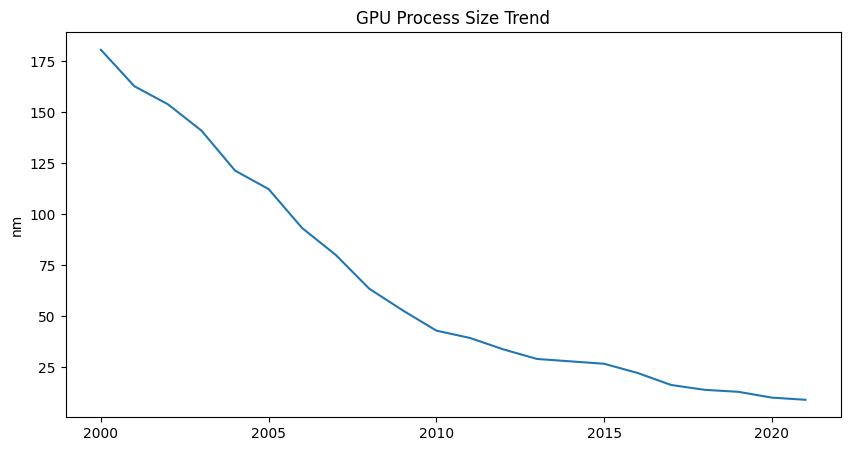

In [74]:
plt.figure(figsize=(10,5))
plt.plot(df_ps['Year'],df_ps['Process_Size'])
plt.title('GPU Process Size Trend')
plt.ylabel('nm')

## GPU Die Size Trend


In [75]:
df_ds = df_w[['Type','Product','Date','Die_Size']].where(df_w['Type']=='GPU').dropna()
df_ds

,Type,Product,Date,Die_Size
2192,GPU,Intel Xeon E3-1275,04/03/2011,216.000000
2193,GPU,Matrox Parhelia 128 MB,6/25/2002,174.000000
2194,GPU,NVIDIA GeForce MX150 GP107,2/23/2019,132.000000
2195,GPU,Intel GMA 500,03/02/2008,188.440445
2196,GPU,ATI Radeon HD 4350 AGP,9/30/2008,73.000000
...,...,...,...,...
4849,GPU,NVIDIA Quadro 3000M,2/22/2011,332.000000
4850,GPU,Intel GMA 950,06/01/2005,188.440445
4851,GPU,NVIDIA GeForce GT 320M,03/03/2010,100.000000
4852,GPU,NVIDIA GeForce FX 5200,03/06/2003,65.000000


In [76]:
df_ds = df_ds.sort_values(by='Die_Size')
df_ds = df_ds.head(7)
df_ds

,Type,Product,Date,Die_Size
3188,GPU,Sony Playstation Vita GPU,12/11/2011,6.0
3870,GPU,AMD Radeon R7 M260DX,01/07/2014,56.0
3773,GPU,AMD Radeon HD 8550M,7/13/2014,56.0
2582,GPU,AMD Radeon R5 M230 Rebrand,5/31/2014,56.0
4058,GPU,AMD Radeon R5 M420,5/15/2016,56.0
3948,GPU,AMD Radeon R7 M365X,05/05/2015,56.0
3717,GPU,AMD Radeon HD 8670A,02/02/2013,56.0


In [77]:
df_ds = df_w[['Type','Product','Die_Size']].where(df_w['Type']=='GPU').dropna()
df_ds = df_ds.sort_values(by='Die_Size')
df_ds = df_ds.head(7)
df_ds

,Type,Product,Die_Size
3188,GPU,Sony Playstation Vita GPU,6.0
3870,GPU,AMD Radeon R7 M260DX,56.0
3773,GPU,AMD Radeon HD 8550M,56.0
2582,GPU,AMD Radeon R5 M230 Rebrand,56.0
4058,GPU,AMD Radeon R5 M420,56.0
3948,GPU,AMD Radeon R7 M365X,56.0
3717,GPU,AMD Radeon HD 8670A,56.0


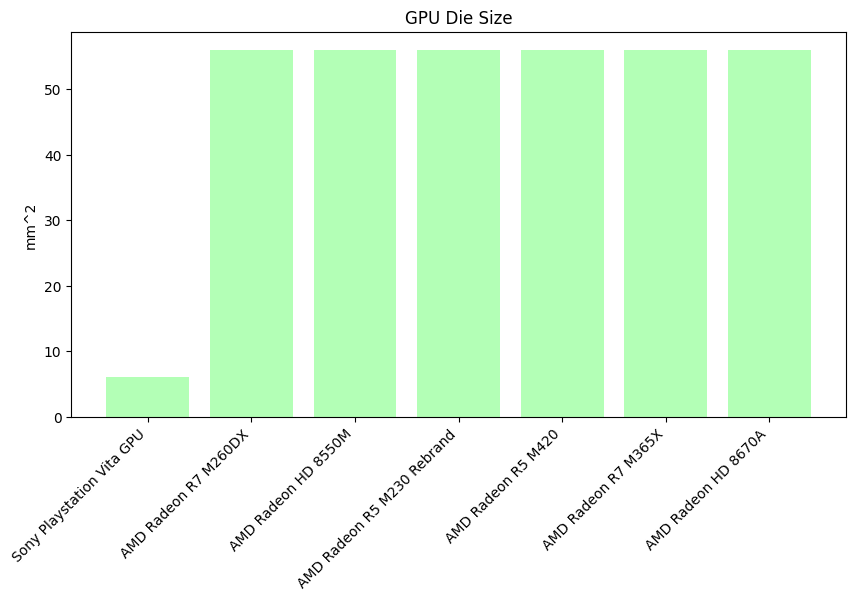

In [78]:
plt.figure(figsize=(10, 5)) 
plt.bar(df_ds['Product'], df_ds['Die_Size'], color=["#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6"])  
plt.title('GPU Die Size')
plt.ylabel('mm^2')
plt.xticks(rotation=45, ha='right')
plt.show()


In [79]:
df_ds = df_w[['Type','Date','Product','Die_Size']].where(df_w['Type']=='GPU').dropna()
df_ds

,Type,Date,Product,Die_Size
2192,GPU,04/03/2011,Intel Xeon E3-1275,216.000000
2193,GPU,6/25/2002,Matrox Parhelia 128 MB,174.000000
2194,GPU,2/23/2019,NVIDIA GeForce MX150 GP107,132.000000
2195,GPU,03/02/2008,Intel GMA 500,188.440445
2196,GPU,9/30/2008,ATI Radeon HD 4350 AGP,73.000000
...,...,...,...,...
4849,GPU,2/22/2011,NVIDIA Quadro 3000M,332.000000
4850,GPU,06/01/2005,Intel GMA 950,188.440445
4851,GPU,03/03/2010,NVIDIA GeForce GT 320M,100.000000
4852,GPU,03/06/2003,NVIDIA GeForce FX 5200,65.000000


In [80]:
df_ds['Date'] = pd.to_datetime(df_ds['Date'])
df_ds['Year'] = df_ds['Date'].dt.year
df_ds 

,Type,Date,Product,Die_Size,Year
2192,GPU,2011-04-03,Intel Xeon E3-1275,216.000000,2011.0
2193,GPU,2002-06-25,Matrox Parhelia 128 MB,174.000000,2002.0
2194,GPU,2019-02-23,NVIDIA GeForce MX150 GP107,132.000000,2019.0
2195,GPU,2008-03-02,Intel GMA 500,188.440445,2008.0
2196,GPU,2008-09-30,ATI Radeon HD 4350 AGP,73.000000,2008.0
...,...,...,...,...,...
4849,GPU,2011-02-22,NVIDIA Quadro 3000M,332.000000,2011.0
4850,GPU,2005-06-01,Intel GMA 950,188.440445,2005.0
4851,GPU,2010-03-03,NVIDIA GeForce GT 320M,100.000000,2010.0
4852,GPU,2003-03-06,NVIDIA GeForce FX 5200,65.000000,2003.0


In [81]:
df_ds = df_ds.groupby('Year')['Die_Size'].mean().reset_index()
df_ds

,Year,Die_Size
0,2000.0,106.848015
1,2001.0,111.924925
2,2002.0,114.646995
3,2003.0,138.633286
4,2004.0,176.308971
5,2005.0,188.639598
6,2006.0,175.216775
7,2007.0,174.506855
8,2008.0,197.312619
9,2009.0,176.377358


Text(0, 0.5, 'nm')

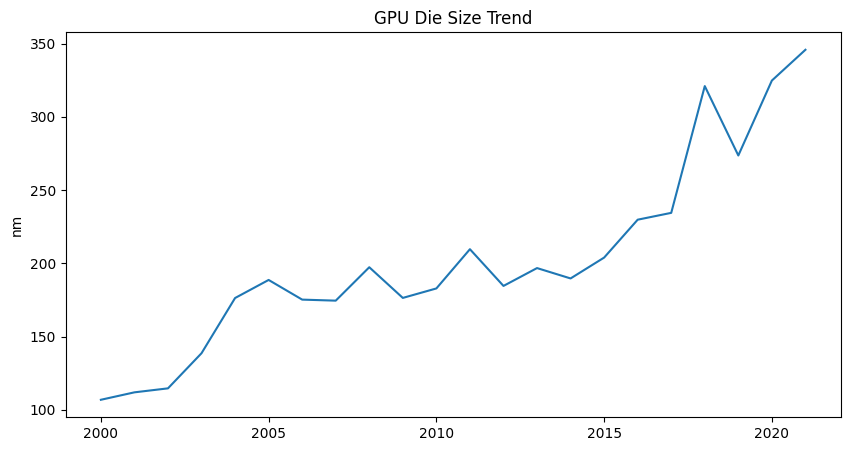

In [82]:
plt.figure(figsize=(10,5))
plt.plot(df_ds['Year'],df_ds['Die_Size'])
plt.title('GPU Die Size Trend')
plt.ylabel('nm')

## GPU Transistor Trend

In [83]:
df_tr = df_w[['Type','Product','Date','Transistor']].where(df_w['Type']=='GPU').dropna()
df_tr

,Type,Product,Date,Transistor
2192,GPU,Intel Xeon E3-1275,04/03/2011,1160.000000
2193,GPU,Matrox Parhelia 128 MB,6/25/2002,80.000000
2194,GPU,NVIDIA GeForce MX150 GP107,2/23/2019,3300.000000
2195,GPU,Intel GMA 500,03/02/2008,1929.922279
2196,GPU,ATI Radeon HD 4350 AGP,9/30/2008,242.000000
...,...,...,...,...
4849,GPU,NVIDIA Quadro 3000M,2/22/2011,1950.000000
4850,GPU,Intel GMA 950,06/01/2005,1929.922279
4851,GPU,NVIDIA GeForce GT 320M,03/03/2010,486.000000
4852,GPU,NVIDIA GeForce FX 5200,03/06/2003,29.000000


In [84]:
df_tr = df_tr.sort_values(by='Transistor')
df_tr = df_tr.head(7)
df_tr

,Type,Product,Date,Transistor
2688,GPU,ATI ES1000,10/18/2007,8.0
4845,GPU,NVIDIA Tegra 3 GPU,11/09/2011,10.0
4185,GPU,Matrox Millennium G550,11/26/2001,10.0
2794,GPU,Matrox Millennium G550 PCIe,11/26/2001,10.0
4725,GPU,Matrox Millennium G450,NaT,10.0
2992,GPU,Matrox Millennium G450 LP,NaT,10.0
2662,GPU,Matrox Millennium G450 x2 MMS,6/19/2002,10.0


In [85]:
df_tr = df_w[['Type','Product','Transistor']].where(df_w['Type']=='GPU').dropna()
df_tr = df_tr.sort_values(by='Transistor')
df_tr = df_tr.head(7)
df_tr

,Type,Product,Transistor
2688,GPU,ATI ES1000,8.0
4845,GPU,NVIDIA Tegra 3 GPU,10.0
4185,GPU,Matrox Millennium G550,10.0
2794,GPU,Matrox Millennium G550 PCIe,10.0
4725,GPU,Matrox Millennium G450,10.0
2992,GPU,Matrox Millennium G450 LP,10.0
2662,GPU,Matrox Millennium G450 x2 MMS,10.0


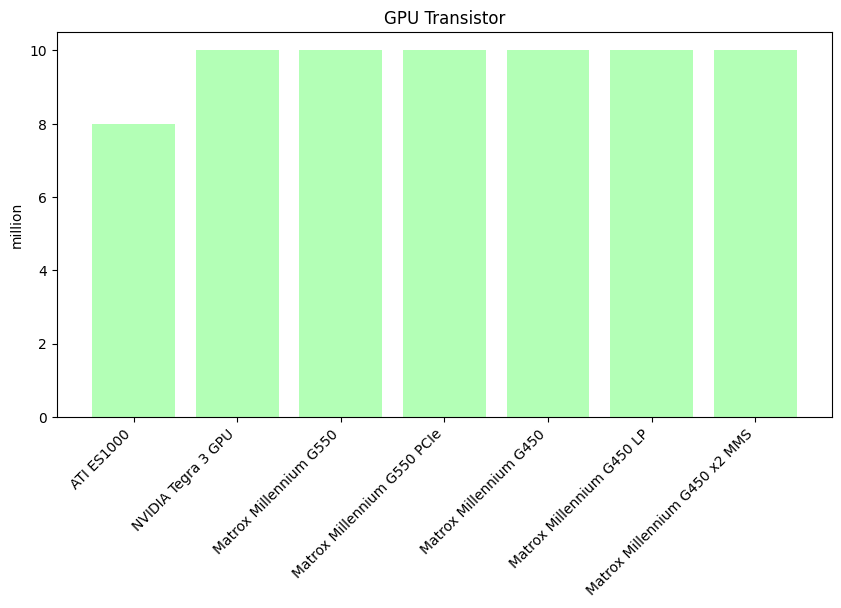

In [86]:
plt.figure(figsize=(10, 5)) 
plt.bar(df_tr['Product'], df_tr['Transistor'], color=["#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6"])  
plt.title('GPU Transistor')
plt.ylabel('million')
plt.xticks(rotation=45, ha='right')
plt.show()


In [87]:
df_tr = df_w[['Type','Date','Product','Transistor']].where(df_w['Type']=='GPU').dropna()
df_tr

,Type,Date,Product,Transistor
2192,GPU,04/03/2011,Intel Xeon E3-1275,1160.000000
2193,GPU,6/25/2002,Matrox Parhelia 128 MB,80.000000
2194,GPU,2/23/2019,NVIDIA GeForce MX150 GP107,3300.000000
2195,GPU,03/02/2008,Intel GMA 500,1929.922279
2196,GPU,9/30/2008,ATI Radeon HD 4350 AGP,242.000000
...,...,...,...,...
4849,GPU,2/22/2011,NVIDIA Quadro 3000M,1950.000000
4850,GPU,06/01/2005,Intel GMA 950,1929.922279
4851,GPU,03/03/2010,NVIDIA GeForce GT 320M,486.000000
4852,GPU,03/06/2003,NVIDIA GeForce FX 5200,29.000000


In [88]:
df_tr['Date'] = pd.to_datetime(df_tr['Date'])
df_tr['Year'] = df_tr['Date'].dt.year
df_tr

,Type,Date,Product,Transistor,Year
2192,GPU,2011-04-03,Intel Xeon E3-1275,1160.000000,2011.0
2193,GPU,2002-06-25,Matrox Parhelia 128 MB,80.000000,2002.0
2194,GPU,2019-02-23,NVIDIA GeForce MX150 GP107,3300.000000,2019.0
2195,GPU,2008-03-02,Intel GMA 500,1929.922279,2008.0
2196,GPU,2008-09-30,ATI Radeon HD 4350 AGP,242.000000,2008.0
...,...,...,...,...,...
4849,GPU,2011-02-22,NVIDIA Quadro 3000M,1950.000000,2011.0
4850,GPU,2005-06-01,Intel GMA 950,1929.922279,2005.0
4851,GPU,2010-03-03,NVIDIA GeForce GT 320M,486.000000,2010.0
4852,GPU,2003-03-06,NVIDIA GeForce FX 5200,29.000000,2003.0


In [89]:
df_tr = df_tr.groupby('Year')['Transistor'].mean().reset_index()
df_tr

,Year,Transistor
0,2000.0,215.525561
1,2001.0,119.568256
2,2002.0,104.273110
3,2003.0,139.747224
4,2004.0,332.929494
5,2005.0,294.678484
6,2006.0,348.024983
7,2007.0,388.793041
8,2008.0,566.823445
9,2009.0,613.830189


Text(0, 0.5, 'million')

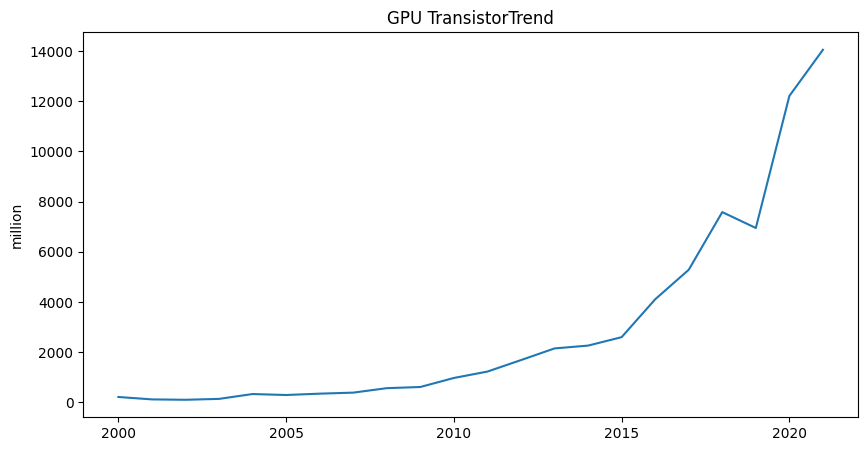

In [90]:
plt.figure(figsize=(10,5))
plt.plot(df_tr['Year'],df_tr['Transistor'])
plt.title('GPU TransistorTrend')
plt.ylabel('million')

## GPU Frequency  Trend

In [91]:
df_fr = df_w[['Type','Date','Freq']].where(df_w['Type']=='GPU').dropna()
df_fr

,Type,Date,Freq
2192,GPU,04/03/2011,100.0
2193,GPU,6/25/2002,200.0
2194,GPU,2/23/2019,1469.0
2195,GPU,03/02/2008,200.0
2196,GPU,9/30/2008,600.0
...,...,...,...
4849,GPU,2/22/2011,450.0
4850,GPU,06/01/2005,250.0
4851,GPU,03/03/2010,500.0
4852,GPU,03/06/2003,250.0


In [92]:
df_fr['Date'] = pd.to_datetime(df_fr['Date'])
df_fr['Year'] = df_fr['Date'].dt.year
df_fr

,Type,Date,Freq,Year
2192,GPU,2011-04-03,100.0,2011.0
2193,GPU,2002-06-25,200.0,2002.0
2194,GPU,2019-02-23,1469.0,2019.0
2195,GPU,2008-03-02,200.0,2008.0
2196,GPU,2008-09-30,600.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,450.0,2011.0
4850,GPU,2005-06-01,250.0,2005.0
4851,GPU,2010-03-03,500.0,2010.0
4852,GPU,2003-03-06,250.0,2003.0


In [93]:
df_fr = df_w[['Type','Product','Freq']].where(df_w['Type']=='GPU').dropna()
df_fr = df_fr.sort_values(by='Freq')
df_fr = df_fr.head(7)
df_fr

,Type,Product,Freq
2192,GPU,Intel Xeon E3-1275,100.0
3507,GPU,Intel i830MG Graphics,100.0
4360,GPU,Intel HD Graphics,100.0
4357,GPU,NVIDIA Vanta LT,105.0
3164,GPU,ATI Fire GL2,120.0
3720,GPU,ATI Fire GL3,120.0
2992,GPU,Matrox Millennium G450 LP,125.0


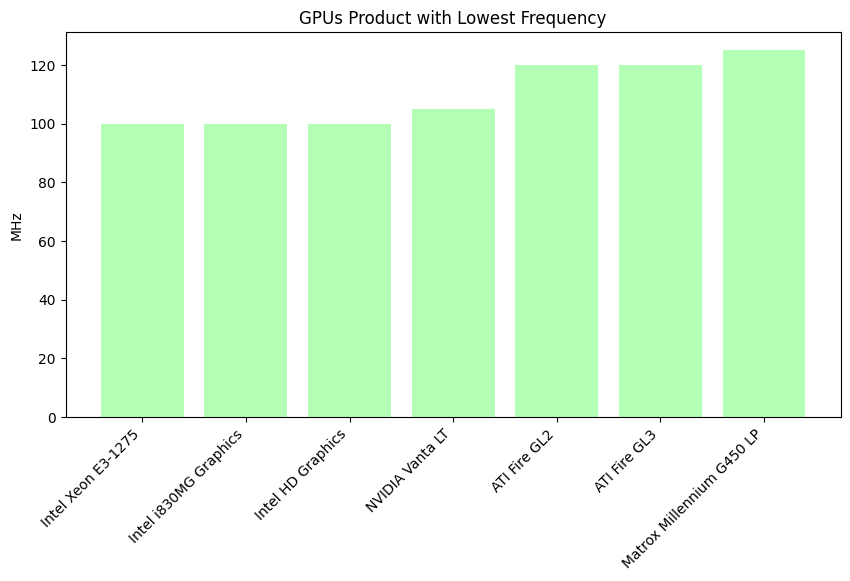

In [94]:
plt.figure(figsize=(10, 5)) 
plt.bar(df_fr['Product'], df_fr['Freq'], color=["#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6","#b3ffb6"])  
plt.title('GPUs Product with Lowest Frequency')
plt.ylabel('MHz')
plt.xticks(rotation=45, ha='right')
plt.show()


In [95]:
df_fr = df_w[['Type','Date','Product','Freq']].where(df_w['Type']=='GPU').dropna()
df_fr

,Type,Date,Product,Freq
2192,GPU,04/03/2011,Intel Xeon E3-1275,100.0
2193,GPU,6/25/2002,Matrox Parhelia 128 MB,200.0
2194,GPU,2/23/2019,NVIDIA GeForce MX150 GP107,1469.0
2195,GPU,03/02/2008,Intel GMA 500,200.0
2196,GPU,9/30/2008,ATI Radeon HD 4350 AGP,600.0
...,...,...,...,...
4849,GPU,2/22/2011,NVIDIA Quadro 3000M,450.0
4850,GPU,06/01/2005,Intel GMA 950,250.0
4851,GPU,03/03/2010,NVIDIA GeForce GT 320M,500.0
4852,GPU,03/06/2003,NVIDIA GeForce FX 5200,250.0


In [96]:
df_fr['Date'] = pd.to_datetime(df_fr['Date'])
df_fr['Year'] = df_fr['Date'].dt.year
df_fr 

,Type,Date,Product,Freq,Year
2192,GPU,2011-04-03,Intel Xeon E3-1275,100.0,2011.0
2193,GPU,2002-06-25,Matrox Parhelia 128 MB,200.0,2002.0
2194,GPU,2019-02-23,NVIDIA GeForce MX150 GP107,1469.0,2019.0
2195,GPU,2008-03-02,Intel GMA 500,200.0,2008.0
2196,GPU,2008-09-30,ATI Radeon HD 4350 AGP,600.0,2008.0
...,...,...,...,...,...
4849,GPU,2011-02-22,NVIDIA Quadro 3000M,450.0,2011.0
4850,GPU,2005-06-01,Intel GMA 950,250.0,2005.0
4851,GPU,2010-03-03,NVIDIA GeForce GT 320M,500.0,2010.0
4852,GPU,2003-03-06,NVIDIA GeForce FX 5200,250.0,2003.0


In [97]:
df_fr = df_fr.groupby('Year')['Freq'].mean().reset_index()
df_fr

,Year,Freq
0,2000.0,165.800000
1,2001.0,196.061224
2,2002.0,244.289855
3,2003.0,304.803571
4,2004.0,367.376923
5,2005.0,405.273684
6,2006.0,460.472868
7,2007.0,524.360759
8,2008.0,564.190751
9,2009.0,584.584906


Text(0, 0.5, 'nm')

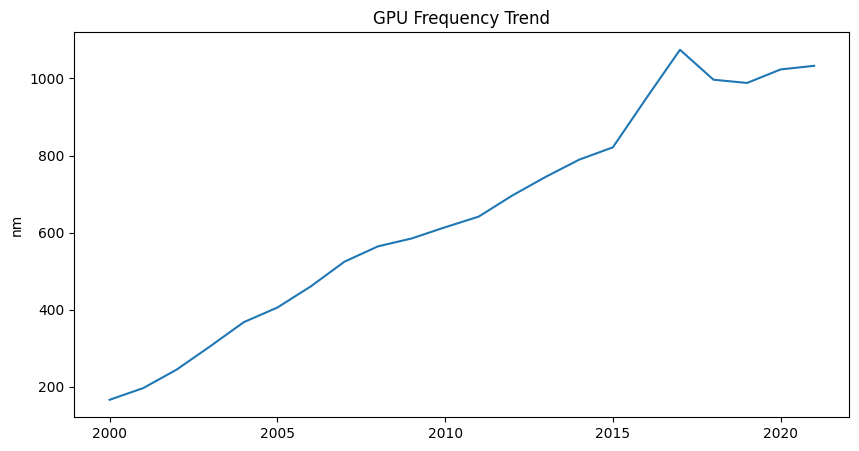

In [98]:
plt.figure(figsize=(10,5))
plt.plot(df_fr['Year'],df_fr['Freq'])
plt.title('GPU Frequency Trend')
plt.ylabel('nm')